In [1]:
import pandas as pd
import numpy as np
from joblib import dump, load

import string, os, random
import calendar
from functools import reduce

import seaborn as sns
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
#from matplotlib.patches import Circle
#from matplotlib.lines import Line2D

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.express as py

import warnings
warnings.filterwarnings("ignore")

In [25]:
"""
notebook: 1.1-simmler-data-preprocessing_accidents_visualize
---------------------------------------------------------------------
visualize accident distributions, countplots
"""

'\nnotebook: 1.1-simmler-data-preprocessing_accidents_visualize\n---------------------------------------------------------------------\nvisualize accident distributions, countplots\n'

In [2]:
#------------------------------------------------------------------------------------------------
# Import joblib file with 2019-2024 preprocessed data for accidents
#------------------------------------------------------------------------------------------------
df_acc = load(r'..\..\data\processed\2_preprocessing\1.1-simmler-data-preprocessing_accidents.joblib')

display(df_acc.head(3))
df_acc.info()

#df_acc['acc_department'].unique()


,acc_num,acc_date,acc_year,acc_month,acc_hour,acc_department,acc_municipality,acc_metro,acc_long,acc_lat,acc_ambient_lightning,acc_atmosphere,acc_urbanization_level,acc_intersection,acc_collision_type
0,201900000001,2019-11-30,2019,11,1,93,93053,1,2.470120,48.896210,4.0,1.0,1,1.0,2.0
1,201900000002,2019-11-30,2019,11,2,93,93066,1,2.368800,48.930700,3.0,1.0,1,1.0,6.0
2,201900000003,2019-11-28,2019,11,15,92,92036,1,2.319174,48.935872,1.0,1.0,1,1.0,4.0


<class 'pandas.core.frame.DataFrame'>
Index: 327628 entries, 0 to 54401
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   acc_num                 327628 non-null  int64         
 1   acc_date                327628 non-null  datetime64[ns]
 2   acc_year                327628 non-null  int64         
 3   acc_month               327628 non-null  int64         
 4   acc_hour                327628 non-null  int64         
 5   acc_department          327628 non-null  object        
 6   acc_municipality        327628 non-null  object        
 7   acc_metro               327628 non-null  int64         
 8   acc_long                327628 non-null  float64       
 9   acc_lat                 327628 non-null  float64       
 10  acc_ambient_lightning   327619 non-null  float64       
 11  acc_atmosphere          327602 non-null  float64       
 12  acc_urbanization_level  327628 non-n

In [27]:
# -------------------------------------------------------------------------------------------------
# todo: we have recurring index, for each year, should the index be reset?
# -------------------------------------------------------------------------------------------------

#df_acc = df_acc.reset_index(drop=True)
#df_acc


In [3]:
# -------------------------------------------------------------------------------------------------
# import graphs
# -------------------------------------------------------------------------------------------------

#import os
#import sys
#sys.path.append(os.getcwd())

import importlib
import lib_1_0_simmler_data_preprocessing_graph_1 as lib_graph_1

importlib.reload(lib_graph_1)


<module 'lib_1_0_simmler_data_preprocessing_graph_1' from 'C:\\Users\\asimm\\RepoDS4\\SEP25-BDS-Road-Accidents\\notebooks\\2-data-preprocessing\\lib_1_0_simmler_data_preprocessing_graph_1.py'>

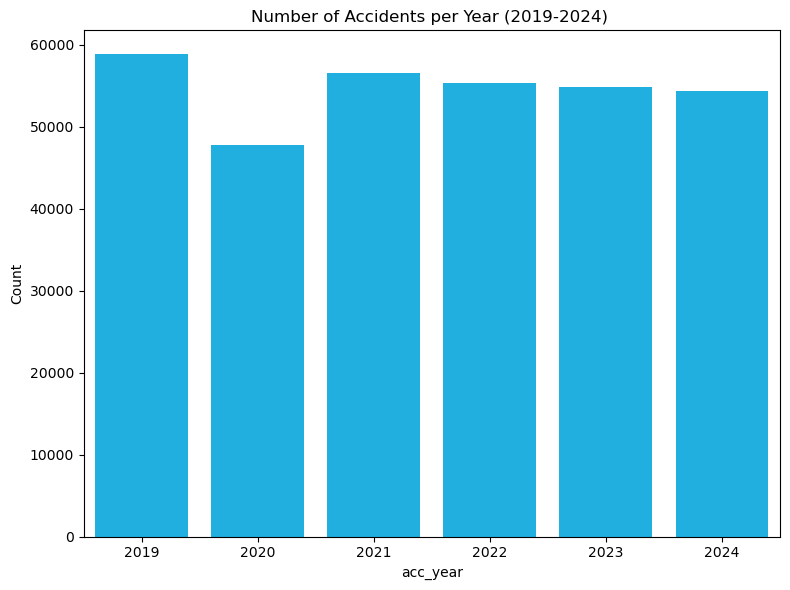

In [4]:
# -------------------------------------------------------------------------------------------------
# Distribution of Accidents
# Distribution per year
#
# 2020 has slightly less accidents, probably due to the pandemic
# -------------------------------------------------------------------------------------------------

lib_graph_1.sns_countplot(df_acc, 'acc_year', title='Number of Accidents per Year (2019-2024)')


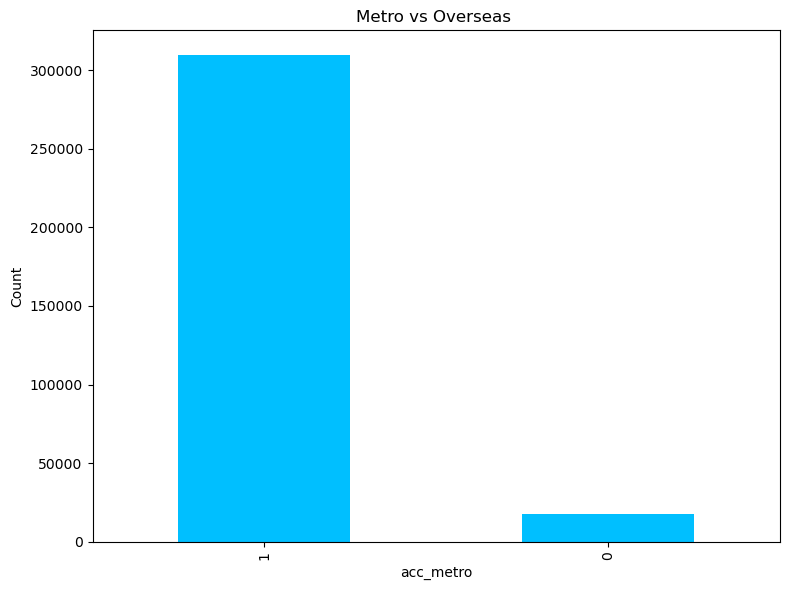

In [5]:
# -------------------------------------------------------------------------------------------------
# Distribution Mainland France vs Overseas Departments
#
# Mainland France has much more accidents than the Overseas Departments
# -------------------------------------------------------------------------------------------------

lib_graph_1.countplot(df_acc, 'acc_metro', title='Metro vs Overseas', title_postfix='') #column_title='Metro', 


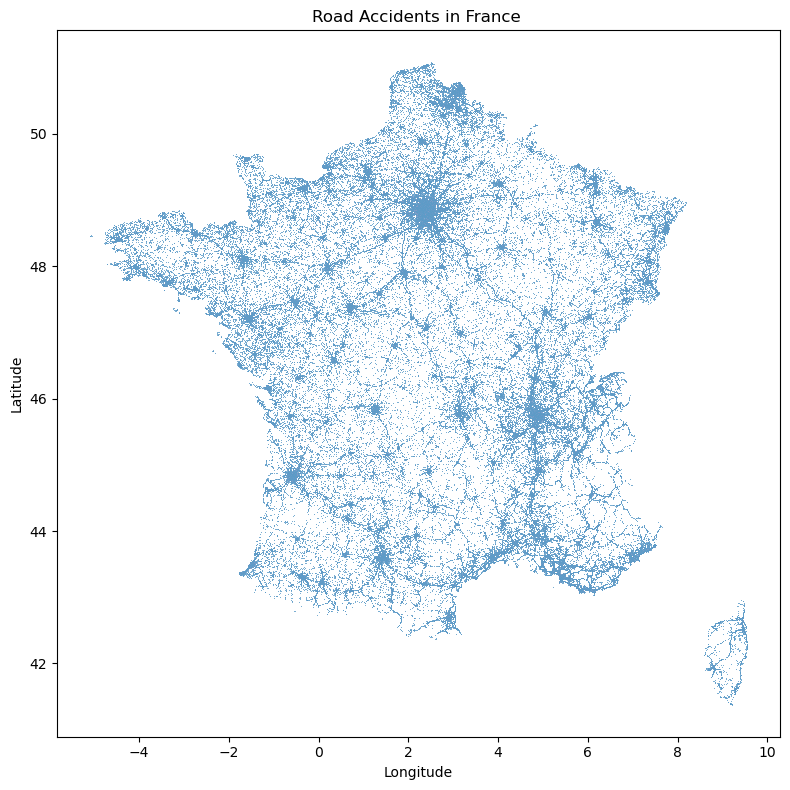

In [6]:
# -------------------------------------------------------------------------------------------------
# Map with accidents in Mainland France
#
# The map shows that the distribution of accidents also reflects population size
# -------------------------------------------------------------------------------------------------

def show_metro_accidents_map(char, year=''):
    
    data = char.loc[char['acc_metro'] == 1]
    
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=data, x='acc_long', y='acc_lat', s=0.5) #0.8 s=0.1 s=0.5
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f"Road Accidents in France {year}") 
    plt.tight_layout()
    plt.show()
    
show_metro_accidents_map(df_acc)


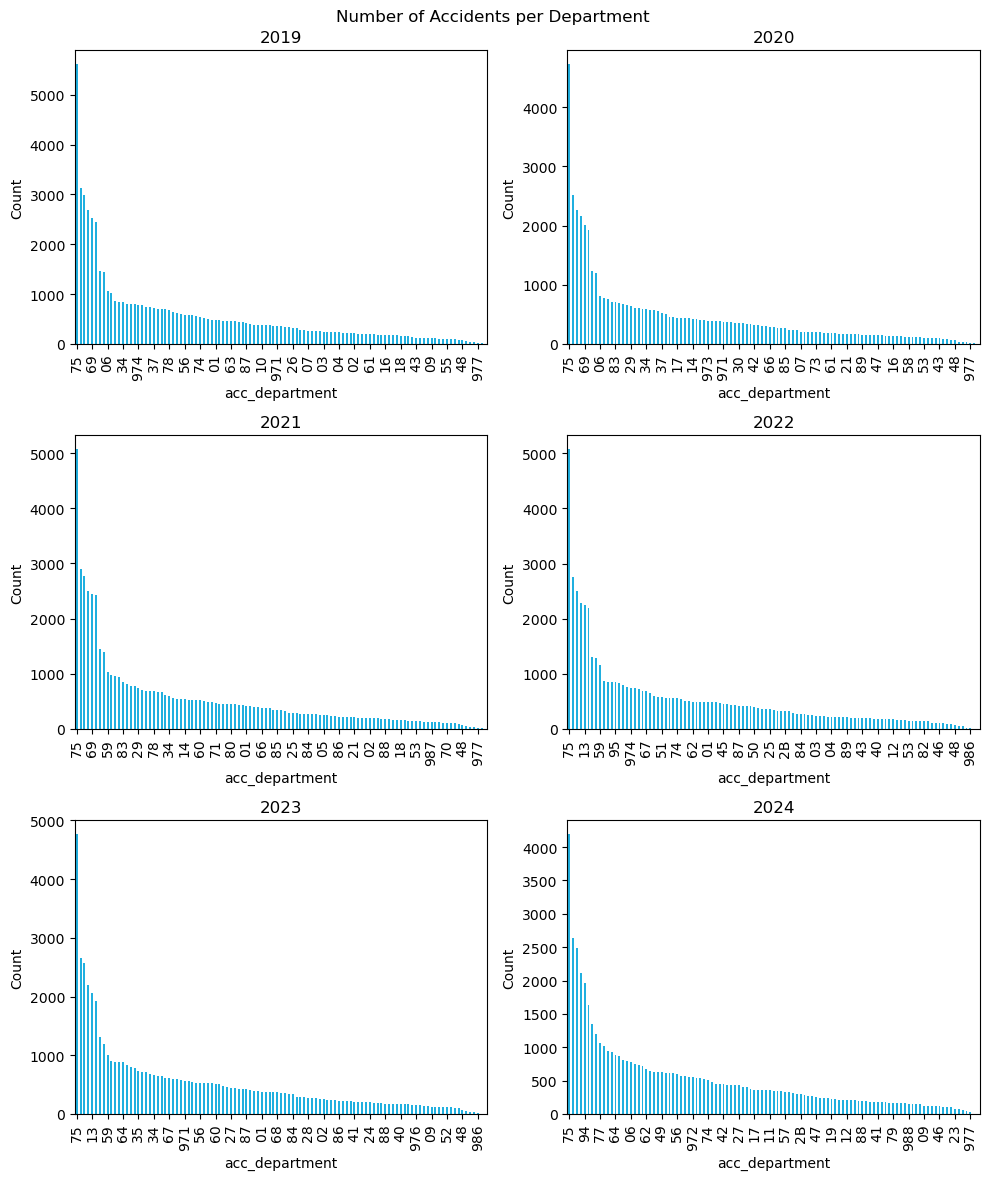

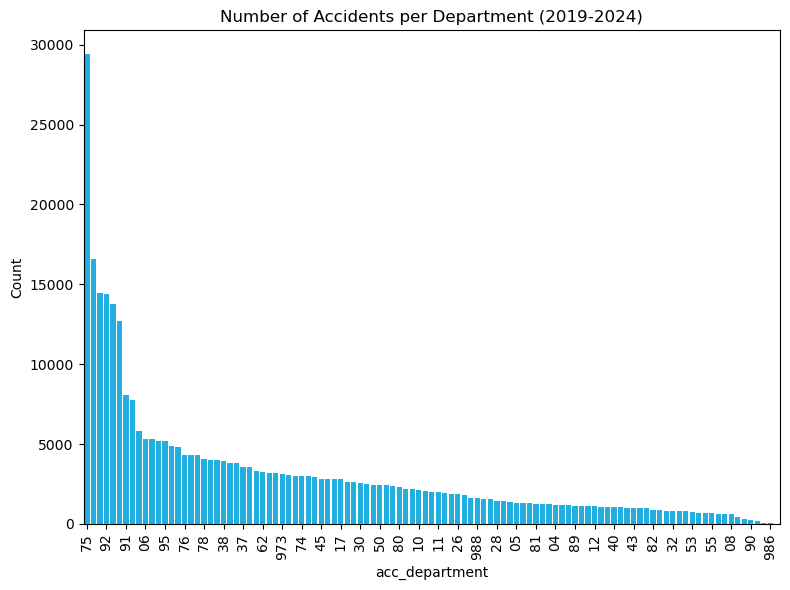

In [7]:
# -------------------------------------------------------------------------------------------------
# Distribution per department
#
# Paris (department 75) has much more accidents than any other department
# The distribution of accidents is imbalanced, reflecting imbalanced population size
# -------------------------------------------------------------------------------------------------

importlib.reload(lib_graph_1)

lib_graph_1.sns_countplot_years(df_acc, 'acc_department', column_title='Department', 
                           bar_width=0.5, xtick_freq=4, xtick_rotate=90, ordered=True)

lib_graph_1.sns_countplot(df_acc, 'acc_department', title='Number of Accidents per Department', #column_title='Department',
                          title_postfix='(2019-2024)', 
                          bar_width=0.8, xtick_freq=3, xtick_rotate=90, ordered=True)


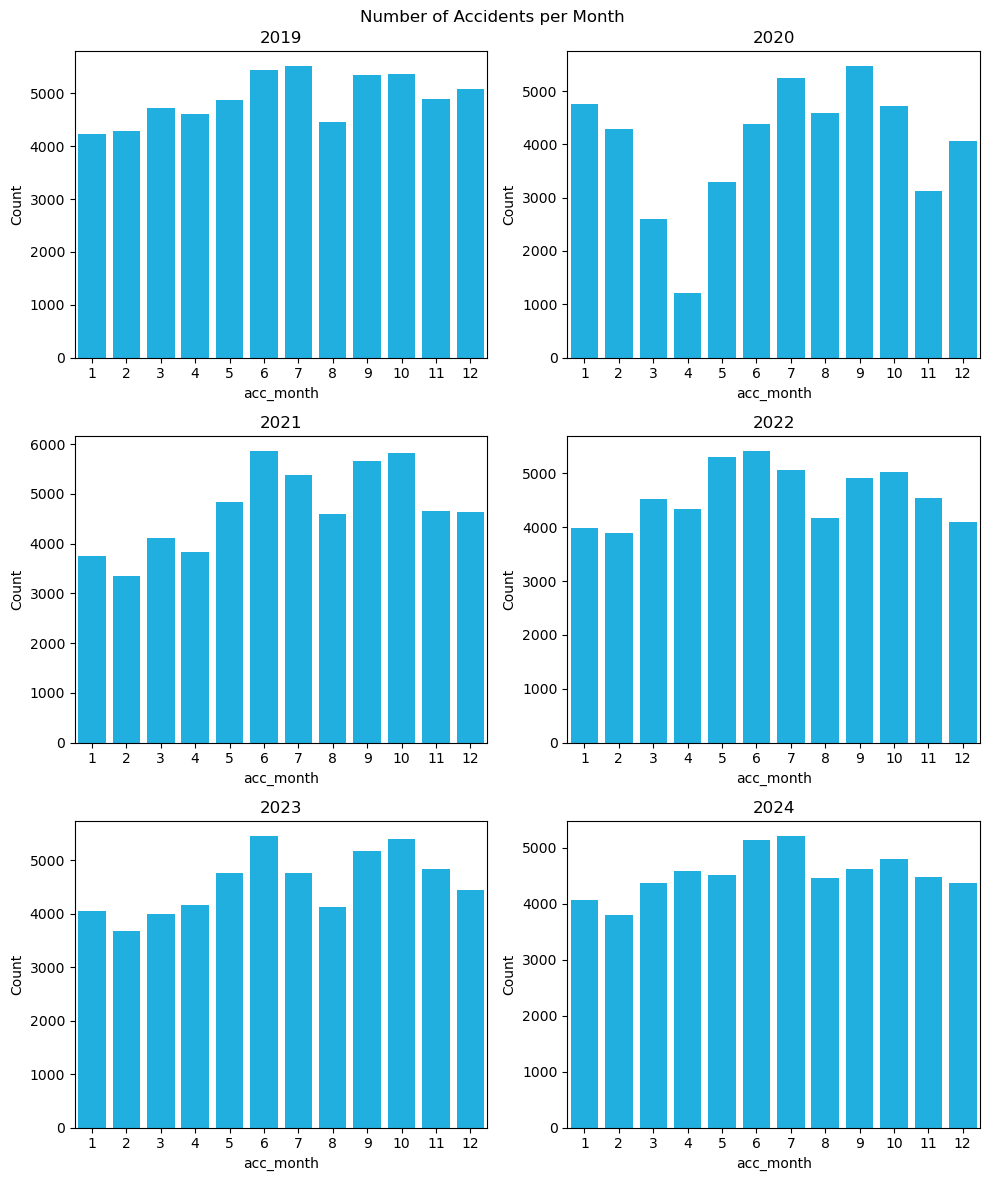

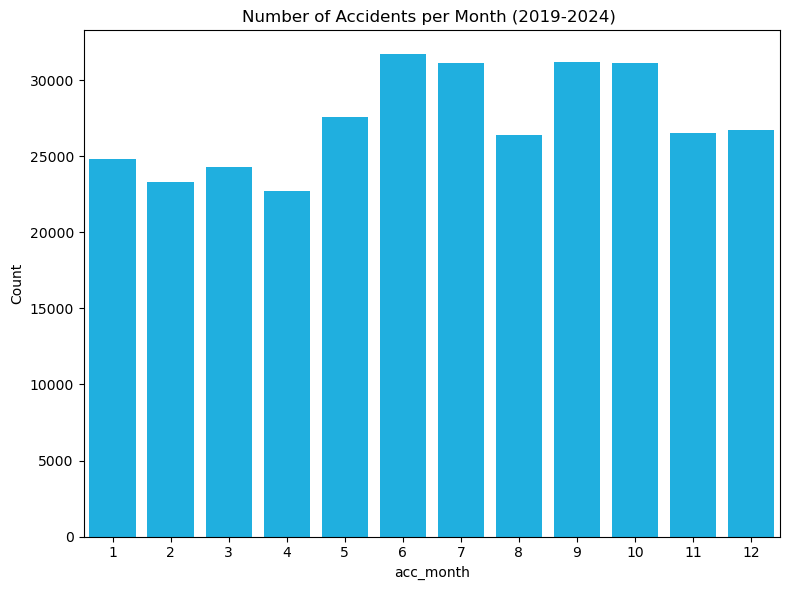

In [8]:
# -------------------------------------------------------------------------------------------------
# Distribution per month
#
# Most years show a peek during the holiday season and in autumn
# 2020 has a different distribution with a dig in spring, likely due to the pandemic
# -------------------------------------------------------------------------------------------------

importlib.reload(lib_graph_1)

lib_graph_1.sns_countplot_years(df_acc, 'acc_month', column_title='Month')
lib_graph_1.sns_countplot(df_acc, 'acc_month', title='Number of Accidents per Month (2019-2024)') #column_title='Month', 


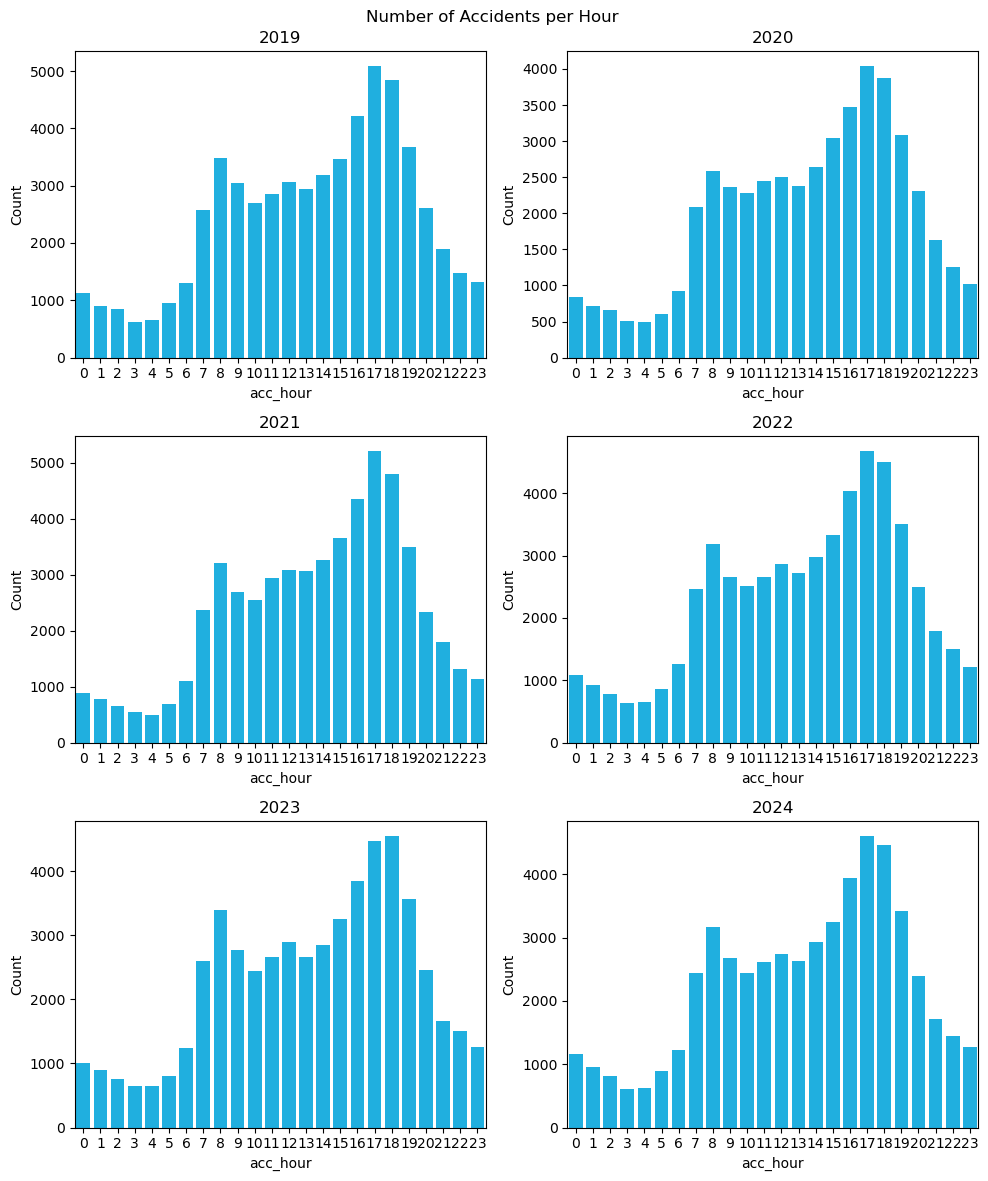

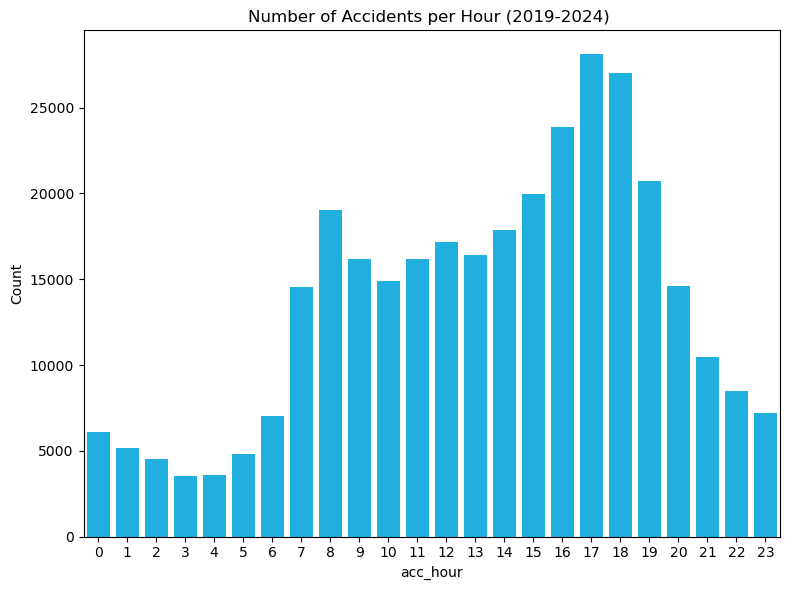

In [9]:
# -------------------------------------------------------------------------------------------------
# Distribution per hour
#
# Accidents peek during rush-hours in the morning and the later afternoon
# -------------------------------------------------------------------------------------------------

importlib.reload(lib_graph_1)

lib_graph_1.sns_countplot_years(df_acc, 'acc_hour', column_title='Hour')
lib_graph_1.sns_countplot(df_acc, 'acc_hour', title='Number of Accidents per Hour (2019-2024)') #column_title='Hour', 
